In [1]:
# NLTK 설치
!pip install nltk

  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached regex-2021.7.6-cp39-cp39-win_amd64.whl (270 kB)


You should consider upgrading via the 'c:\20210731\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import nltk
print(nltk.__version__)

3.6.2


In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
# 자연어 처리를 위한 과정 중 가장 기초적인 과정
# Text Preprocessing 과 exploratory analysis
# Text Preprocessing에는 tokenization, stemming, stop word 제거
# exploratory analysis에는 text의 주요 주제 및 단어들의 빈도 등등을 통해서 해당의 text 특징을 이해하려 하는 것

In [7]:
import nltk
from nltk.corpus import twitter_samples as ts

In [8]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [10]:
sample_tw = ts.strings("tweets.20150430-223406.json")
type(sample_tw), len(sample_tw)

(list, 20000)

In [11]:
sample_tw[20]

"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"

In [13]:
from nltk.tokenize import word_tokenize as wtoken
wtoken(sample_tw[20]), len(wtoken(sample_tw[20]))

In [ ]:
# 빈 칸과 문장기호로 tokenize
from nltk.tokenize import wordpunct_tokenize 
wordpunct_tokenize(sample_tw[20]), len(wordpunct_tokenize(sample_tw[20]))

In [ ]:
# 정규식을 이용해서 tokenize 1
from nltk.tokenize import regexp_tokenize
pattern = "\w+"
regexp_tokenize(sample_tw[20], pattern), len(regexp_tokenize(sample_tw[20], pattern))

In [ ]:
# 정규식을 이용해서 tokenize 2
from nltk.tokenize import regexp_tokenize
pattern = "\w+|[@!,\-]"
regexp_tokenize(sample_tw[20], pattern), len(regexp_tokenize(sample_tw[20], pattern))

In [21]:
# Stemming => 어떤 단어의 base form을 찾는 과정
# 영어 명사의 경우 복수를 단수로 바꾸는 과정부터 시작 
# Porter stemmer : Martin Porter가 만듬
import nltk
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

In [22]:
# example : enjoying, enjoys, enjoyable"
stemming.stem("enjoying"), stemming.stem("enjoys"), stemming.stem("enjoyable")

('enjoy', 'enjoy', 'enjoy')

In [23]:
stemming.stem("variation"), stemming.stem("variate")

('variat', 'variat')

In [26]:
stemming.stem("flyable"), stemming.stem("flying") 

('flyabl', 'fli')

In [27]:
stemming.stem("unkind")

'unkind'

In [31]:
stemming.stem("cooking"), stemming.stem("cookery") 

('cook', 'cookeri')

In [33]:
from nltk.stem import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
lancaster_stemmer.stem("cooking"), lancaster_stemmer.stem("cookery") 

('cook', 'cookery')

In [43]:
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$", min = 2) # ^ 문장의 처음 부분, $ 문장의 마지막 부분, min은 stemmed word의 최소한의 길이

In [42]:
regexp_stemmer.stem("flyable"), regexp_stemmer.stem("flying") 

('fly', 'fly')

In [40]:
# Porter, Lancaster의 경우 영어를 처리, SnowballStemmer는 영어 외에 14개 국가언어에 대해서 stemming을 지원
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("german")
snowball_stemmer.stem("variation"), snowball_stemmer.stem("variate")


('variation', 'variat')

In [38]:
SnowballStemmer.languages, len(SnowballStemmer.languages)

(('arabic',
  'danish',
  'dutch',
  'english',
  'finnish',
  'french',
  'german',
  'hungarian',
  'italian',
  'norwegian',
  'porter',
  'portuguese',
  'romanian',
  'russian',
  'spanish',
  'swedish'),
 16)

In [44]:
# 불용어 (stop words) 제거
from nltk.corpus import stopwords
sw_l = stopwords.words("english")
type(sw_l), len(sw_l)

(list, 179)

In [45]:
sw_l[20:41]

['himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that']

In [51]:
example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords = [
    word for word in example_text.split() if word not in sw_l
]

In [52]:
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

In [55]:
from nltk.corpus import gutenberg

In [ ]:
gutenberg.fileids()

In [57]:
words_in_hamlet = gutenberg.words("shakespeare-hamlet.txt")
type(words_in_hamlet), len(words_in_hamlet)

(nltk.corpus.reader.util.StreamBackedCorpusView, 37360)

In [59]:
words_in_hamlet_without_stopwords = [
    word for word in words_in_hamlet if word not in sw_l
]
type(words_in_hamlet_without_stopwords), 

(list, 25876)

In [60]:
(len(words_in_hamlet_without_stopwords) / len(words_in_hamlet)) * 100

69.26124197002142

In [61]:
# 문장이 존재해서, tokenize -> stemming -> stop word remove까지 완료
# 이제 text를 exploratory analysis할 시간입니다.
# 숫자 데이터의 경우 scatter plot나 histogram등을 그려서 분포, 데이터의 빈도 등을 확인한다.

In [ ]:
import nltk
from nltk.corpus import webtext
webtext.fileids()

In [64]:
webtext_sentences = webtext.sents("firefox.txt")
type(webtext_sentences), len(webtext_sentences)

(nltk.corpus.reader.util.StreamBackedCorpusView, 1142)

In [65]:
webtext_words = webtext.words("firefox.txt")
type(webtext_words), len(webtext_words)

(nltk.corpus.reader.util.StreamBackedCorpusView, 102457)

In [ ]:
vocabulary = set(webtext_words)
type(vocabulary), len(vocabulary)

In [ ]:
frequency_dist = nltk.FreqDist(webtext_words)
type(frequency_dist), len(frequency_dist)

In [ ]:
frequency_dist

In [ ]:
sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)
type(sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)), len(sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True))

In [ ]:
# text에 존재하는 상위 30개 단어
sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)[0:30]

In [ ]:
large_words = dict([
    (k, v) for k, v in frequency_dist.items() if len(k) > 3
])
type(large_words), len(large_words), large_words

In [ ]:
frequency_dist = nltk.FreqDist(large_words)
sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)[0:30]

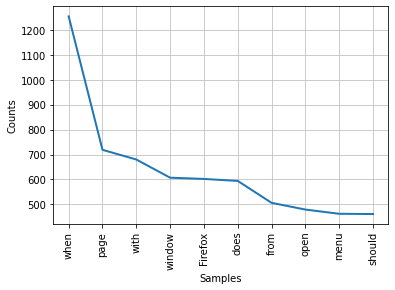

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [85]:
frequency_dist.plot(10, cumulative=False)

In [86]:
!pip install wordcloud

Processing c:\users\한국it비즈니스진흥협회\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0\wordcloud-1.8.1-cp39-cp39-win_amd64.whl


You should consider upgrading via the 'c:\20210731\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [88]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

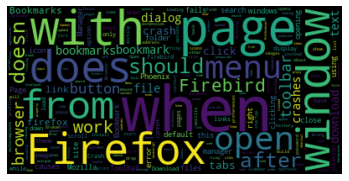

In [89]:
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [90]:
# 불용어 (stop words) 제거
from nltk.corpus import stopwords
sw_l = stopwords.words("english")

In [91]:
webtext_words_without_sw = [word for word in webtext_words if word not in sw_l]

In [92]:
"when" in webtext_words_without_sw

False

In [93]:
"from" in webtext_words_without_sw

False

In [97]:
frequency_dist = nltk.FreqDist(webtext_words_without_sw)

large_words_without_sw = dict([
    (k, v) for k, v in frequency_dist.items() if len(k) > 3
])

frequency_dist = nltk.FreqDist(large_words_without_sw)

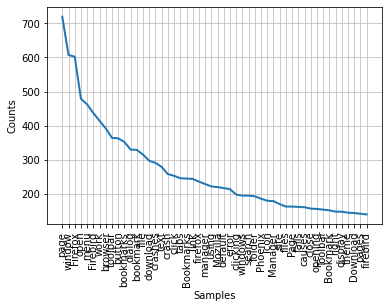

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [98]:
frequency_dist.plot(50, cumulative = False)

In [99]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

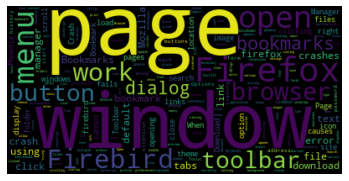

In [100]:
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()